In [50]:
import numpy as np
import matplotlib.pyplot as plt

In [34]:
point2D = np.genfromtxt("2D.txt", dtype = None, delimiter=" ", skip_header = 1) #Read 2D.txt file

In [70]:
point2D = np.array(point2D)
print(point2D)

[[256.     256.    ]
 [156.     256.    ]
 [156.     356.    ]
 [256.     356.    ]
 [356.     356.    ]
 [356.     256.    ]
 [356.     156.    ]
 [256.     156.    ]
 [156.     156.    ]
 [256.     256.    ]
 [165.0909 256.    ]
 [165.0909 346.9091]
 [256.     346.9091]
 [346.9091 346.9091]
 [346.9091 256.    ]
 [346.9091 165.0909]
 [256.     165.0909]
 [165.0909 165.0909]
 [256.     256.    ]
 [172.6667 256.    ]
 [172.6667 339.3333]
 [256.     339.3333]
 [339.3333 339.3333]
 [339.3333 256.    ]
 [339.3333 172.6667]
 [256.     172.6667]
 [172.6667 172.6667]]


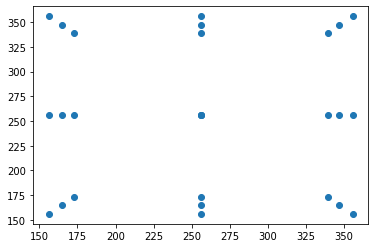

In [71]:
#visualizing the points in 2D
plt.scatter(point2D[:,0],point2D[:,1])
plt.show()

In [48]:
# using with open method here since there are extra number of spaces in the file when used with numpy genfromtxt which
# resulted in 'nan' values

with open("3D.txt", 'r') as f:
        rows = int(f.readline())
        point3D = []
        for i in range(rows):
            # # print(line.split())
            # if line == None:
            #     continue
            point3D.append([float(num) for num in f.readline().split()])

In [59]:
#converting it to array to visualize 
point3D = np.array(point3D)

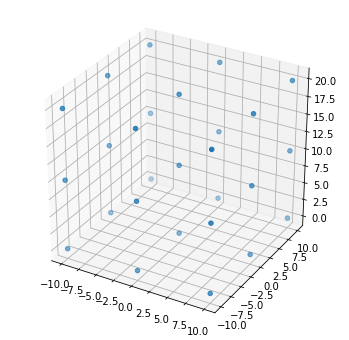

In [69]:
#visualizing the points in 3D
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(point3D[:,0], point3D[:,1],point3D[:,2])
plt.show()



In [137]:
#To find out the calibration matrix

n_p = point3D.shape[0]

A = []

for i in range(n_p):
    x,y,z = point3D[i,0] ,point3D[i,1] , point3D[i,2]
    u,v = point2D[i,0] , point2D[i,1]
    A.append([x,y,z,1,0,0,0,0,-u*x,-u*y,-u*z,-u])
    A.append([0,0,0,0,x,y,z,1,-v*x,-v*y,-v*z,-v])
    
A = np.asarray(A) # Matrix A

u,s,vh =  np.linalg.svd(A) # Applying SVD

L = vh[-1,:]/vh[-1,-1] #To find the minimum eigen value

M = L.reshape(3, 4) #calibrated Matrix

In [139]:
print(A)

[[ 0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00  0.000000e+00
   0.000000e+00  0.000000e+00  0.000000e+00 -0.000000e+00 -0.000000e+00
  -0.000000e+00 -2.560000e+02]
 [ 0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
   0.000000e+00  0.000000e+00  1.000000e+00 -0.000000e+00 -0.000000e+00
  -0.000000e+00 -2.560000e+02]
 [-1.000000e+01  0.000000e+00  0.000000e+00  1.000000e+00  0.000000e+00
   0.000000e+00  0.000000e+00  0.000000e+00  1.560000e+03 -0.000000e+00
  -0.000000e+00 -1.560000e+02]
 [ 0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00 -1.000000e+01
   0.000000e+00  0.000000e+00  1.000000e+00  2.560000e+03 -0.000000e+00
  -0.000000e+00 -2.560000e+02]
 [-1.000000e+01  1.000000e+01  0.000000e+00  1.000000e+00  0.000000e+00
   0.000000e+00  0.000000e+00  0.000000e+00  1.560000e+03 -1.560000e+03
  -0.000000e+00 -1.560000e+02]
 [ 0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00 -1.000000e+01
   1.000000e+01  0.000000e+00  1.000000e+00  3.560000

In [138]:
print(M)

[[1.00000010e+01 4.82086837e-12 2.56000585e+00 2.56000000e+02]
 [1.02227342e-11 1.00000010e+01 2.56000585e+00 2.56000000e+02]
 [3.93606546e-14 3.14258368e-14 1.00000228e-02 1.00000000e+00]]


In [155]:
#computing 2D points using the calibration matrix M and 3D points as input

def evaluate_points(M, points_2d, points_3d):
    N = len(points_3d)
    points_3d = np.hstack((points_3d, np.ones((N, 1))))
    points_3d_proj = np.dot(M, points_3d.T).T
    u = points_3d_proj[:, 0] / points_3d_proj[:, 2]
    v = points_3d_proj[:, 1] / points_3d_proj[:, 2]
    residual = np.sum(np.hypot(u-points_2d[:, 0], v-points_2d[:, 1]))/N
    points_3d_proj = np.hstack((u[:, np.newaxis], v[:, np.newaxis]))
    return points_3d_proj, residual

In [187]:
projected_2d_pts, avg_error = evaluate_points(M, point2D, point3D)

# print(projected_2d_pts)
print(avg_error)


1.3756197920166896e-05


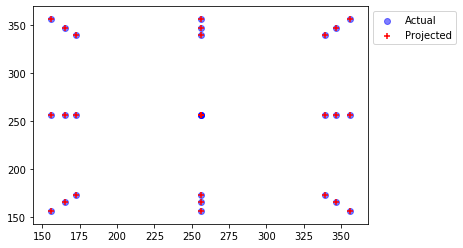

In [191]:
from collections import OrderedDict

#actual 2D
plt.scatter(point2D[:,0],point2D[:,1], color = 'blue', marker = 'o',alpha = 0.5, label = "Actual")

# Projected 2D
for i in range (0,27):
    plt.scatter(projected_2d_pts[i,0],projected_2d_pts[i,1],color = 'r',marker = '+', label = "Projected")

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(1, 1))
plt.show()

1.3756197920166896e-05
